In [12]:
#Gerekli kutuphaneleri import ediyoruz
import cv2
import pytesseract
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
from pytesseract import Output
from IPython.display import clear_output
from datetime import datetime

#pyteseract'in calismasi icin gerekli
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

#train datasetini import ediyoruz
train_json = pd.read_json('../datasets/train.json', orient='columns')

In [4]:
#Train setini ayırıyoruz
train_imgs=train_json.imgs[0:21778]
train_anns=train_json.anns[21778:1074132]
train_imgToAnns=train_json.imgToAnns

In [20]:
train_imgs.head()

a4ea732cd3d5948a    {'id': 'a4ea732cd3d5948a', 'width': 840, 'heig...
4bf43a7b2a898044    {'id': '4bf43a7b2a898044', 'width': 1024, 'hei...
1b55b309b0f50d02    {'id': '1b55b309b0f50d02', 'width': 1024, 'hei...
00c359f294f7dcd9    {'id': '00c359f294f7dcd9', 'width': 1024, 'hei...
04b5a37f762b0f51    {'id': '04b5a37f762b0f51', 'width': 768, 'heig...
Name: imgs, dtype: object

In [21]:
train_anns.head()

a4ea732cd3d5948a_1    {'id': 'a4ea732cd3d5948a_1', 'image_id': 'a4ea...
a4ea732cd3d5948a_2    {'id': 'a4ea732cd3d5948a_2', 'image_id': 'a4ea...
a4ea732cd3d5948a_3    {'id': 'a4ea732cd3d5948a_3', 'image_id': 'a4ea...
a4ea732cd3d5948a_4    {'id': 'a4ea732cd3d5948a_4', 'image_id': 'a4ea...
a4ea732cd3d5948a_5    {'id': 'a4ea732cd3d5948a_5', 'image_id': 'a4ea...
Name: anns, dtype: object

In [22]:
train_imgToAnns.head()

a4ea732cd3d5948a    [a4ea732cd3d5948a_1, a4ea732cd3d5948a_2, a4ea7...
4bf43a7b2a898044    [4bf43a7b2a898044_1, 4bf43a7b2a898044_2, 4bf43...
1b55b309b0f50d02    [1b55b309b0f50d02_1, 1b55b309b0f50d02_2, 1b55b...
00c359f294f7dcd9    [00c359f294f7dcd9_1, 00c359f294f7dcd9_2, 00c35...
04b5a37f762b0f51    [04b5a37f762b0f51_1, 04b5a37f762b0f51_2, 04b5a...
Name: imgToAnns, dtype: object

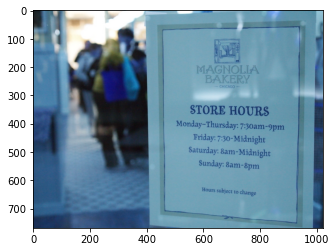

In [19]:
img = cv2.imread('../datasets/train/000bb81adefe7332.jpg')
color = (255,0,0)
plt.imshow(img)
plt.show()

MAGNOLIA
MAGNOLIA
BAKERY
-CHICAGO-
STORE
HOURS
Monday-
thursday:
7:30am-9pm
Friday:
Saturday:
Sunday:
8am-8pm
8am-Midnight
7:30-Midnight
Hours
subject
to
change


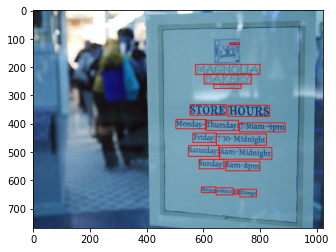

In [18]:
for i in range(train_anns.size):
    if train_anns[i]['image_id'] == "000bb81adefe7332":
        start = (int(train_anns[i]['points'][0]),int(train_anns[i]['points'][1]))
        end = (int(train_anns[i]['points'][4]),int(train_anns[i]['points'][5]))
        print(train_anns[i]['utf8_string'])
        img = cv2.rectangle(img, start, end, color, 2)

plt.imshow(img)
plt.show()